In [194]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import log_loss

In [168]:
# 正例:負例 = 1:9でサンプル生成
X, y = make_classification(n_samples = 100000, n_features = 5,  n_classes = 2, weights = [0.9, 0.1], random_state = 42)

# 学習・テストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [193]:
# サンプリング
sampler = RandomUnderSampler(sampling_strategy={0:y_train.sum(), 1:y_train.sum()}, random_state=42)
X_train_sampled, y_train_sampled = sampler.fit_sample(X, y)

In [195]:
model = LogisticRegression(random_state=42, solver='lbfgs')
model.fit(X_train_sampled, y_train_sampled)
y_proba = model.predict_proba(X_test)

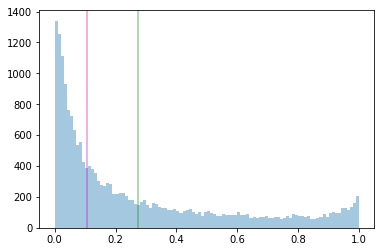

In [203]:
sns.distplot(y_proba[:, 1], kde=False, bins=100)
plt.axvline(np.mean(y_test), c='m', alpha=0.4)
plt.axvline(np.mean(y_proba[:,1]), c='g', alpha=0.4)

In [204]:
def calibration(y_proba, beta):
    
    return y_proba / (y_proba + (1-y_proba) / beta)

In [205]:
sampling_rate = y_train.sum() / len(y_train)
y_proba_calib = calibration(y_proba[:, 1], sampling_rate)

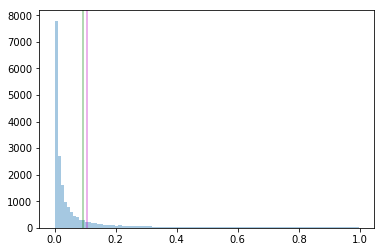

In [206]:
sns.distplot(y_proba_calib, kde=False, bins=100)
plt.axvline(np.mean(y_test), c='m', alpha=0.4)
plt.axvline(np.mean(y_proba_calib), c='g', alpha=0.4)

In [207]:
log_loss(y_test, y_proba[:, 1])

0.33390620817456795

In [208]:
log_loss(y_test, calibration(y_proba[:, 1], sampling_rate))

0.18304919672728379